In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

In [2]:
biden = pd.read_csv('tables/biden')
klobu = pd.read_csv('tables/klobu')
pete = pd.read_csv('tables/pete')
sanders = pd.read_csv('tables/sanders')
warren = pd.read_csv('tables/warren')
debates = pd.read_csv('tables/debates')

In [3]:
biden1 = biden[biden['Speaker'] == 'biden']
klobu1 = klobu[klobu['Speaker'] == 'klobuchar']
pete1 = pete[pete['Speaker'] == 'buttigieg']
sanders1 = sanders[sanders['Speaker'] == 'sanders']
warren1 = warren[warren['Speaker'] == 'warren']
debates1 = debates[debates['Speaker'] != 'speaker']

In [4]:
all_transcripts_list = [debates, biden, klobu, pete, sanders, warren]
all_transcripts = pd.concat(all_transcripts_list)

/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
all_transcripts = all_transcripts.drop('#', axis=1)

In [6]:
all_transcripts.index = range(len(all_transcripts['State']))
all_transcripts

,Line,Speaker,State
0,"… comment on every topic, but over the course...",speaker,florida
1,"all right, so with that business out of the w...",speaker,florida
2,thank you. it’s good to be here.,warren,florida
3,"you have many plans. free college, free child...",speaker,florida
4,i think of it this way. who is this economy r...,warren,florida
...,...,...,...
10407,"i swear to you, i could not ask for a better p...",warren,nevada
10408,"senator, we all appreciate your time tonight. ...",speaker,nevada
10409,thank you.,warren,nevada
10410,we appreciate it. be sure to watch cnn's spec...,speaker,nevada


In [7]:
emotions = pd.read_csv('NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', names=['word', 'emotion', 'association'], skiprows=45, sep='\t')

In [8]:
my_regex = "\(.*\)"
lst = []
for i in all_transcripts['Line']:
    lst.append(re.sub(my_regex, "", i))
    
all_transcripts['Line'] = lst
all_transcripts


,Line,Speaker,State
0,"… comment on every topic, but over the course...",speaker,florida
1,"all right, so with that business out of the w...",speaker,florida
2,thank you. it’s good to be here.,warren,florida
3,"you have many plans. free college, free child...",speaker,florida
4,i think of it this way. who is this economy r...,warren,florida
...,...,...,...
10407,"i swear to you, i could not ask for a better p...",warren,nevada
10408,"senator, we all appreciate your time tonight. ...",speaker,nevada
10409,thank you.,warren,nevada
10410,we appreciate it. be sure to watch cnn's spec...,speaker,nevada


In [9]:
all_transcripts = all_transcripts.drop([3657, 4915, 5452, 5617, 6779, 10279, 10030, 10031])

In [10]:
all_transcripts.index = range(len(all_transcripts['State']))

In [11]:
all_transcripts

,Line,Speaker,State
0,"… comment on every topic, but over the course...",speaker,florida
1,"all right, so with that business out of the w...",speaker,florida
2,thank you. it’s good to be here.,warren,florida
3,"you have many plans. free college, free child...",speaker,florida
4,i think of it this way. who is this economy r...,warren,florida
...,...,...,...
10399,"i swear to you, i could not ask for a better p...",warren,nevada
10400,"senator, we all appreciate your time tonight. ...",speaker,nevada
10401,thank you.,warren,nevada
10402,we appreciate it. be sure to watch cnn's spec...,speaker,nevada


In [12]:
all_transcripts.Speaker.unique()

array(['speaker', 'warren', 'klobuchar', 'orourke', 'booker', 'castro',
       'gabbard', 'blasio', 'delaney', 'ryan', 'sanders', 'bennet',
       'biden', 'harris', 'hickenlooper', 'gillibrand', 'buttigieg',
       'yang', 'swalwell', 'bullock', 'williamson', 'inslee', 'steyer',
       'bloomberg', 'question', 'burnett'], dtype=object)

In [13]:
for idx, i in enumerate(all_transcripts['Speaker']):
    if i == 'burnett':
        all_transcripts['Speaker'][idx] = 'speaker'

In [14]:
all_transcripts.Speaker.unique()

array(['speaker', 'warren', 'klobuchar', 'orourke', 'booker', 'castro',
       'gabbard', 'blasio', 'delaney', 'ryan', 'sanders', 'bennet',
       'biden', 'harris', 'hickenlooper', 'gillibrand', 'buttigieg',
       'yang', 'swalwell', 'bullock', 'williamson', 'inslee', 'steyer',
       'bloomberg', 'question'], dtype=object)

In [15]:
def preprocess(arr):
    '''
    removes puncuation from reviews, puts in lower case
    '''
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    step1 = [REPLACE_NO_SPACE.sub("", line.lower()) for line in arr]
    step2 = [REPLACE_WITH_SPACE.sub(" ", line) for line in step1]
    return step2

In [16]:
all_transcripts['Line'] = preprocess(all_transcripts['Line'])

In [17]:
stop = stopwords.words('english')
stop.append('get')
stop.append('—')
stop.append('thats')
stop.append('dont')
stop.append('us')
stop.append('im')


In [18]:
all_transcripts['Line'] = all_transcripts['Line'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [19]:
all_transcripts

,Line,Speaker,State
0,… comment every topic course next two hours he...,speaker,florida
1,right business way want we’ll start evening se...,speaker,florida
2,thank it’s good,warren,florida
3,many plans free college free childcare governm...,speaker,florida
4,think way economy really working it’s great th...,warren,florida
...,...,...,...
10399,swear could ask better partner julian lets hea...,warren,nevada
10400,senator appreciate time tonight thank much wan...,speaker,nevada
10401,thank,warren,nevada
10402,appreciate sure watch cnns special live covera...,speaker,nevada


In [20]:
for idx, i in enumerate(all_transcripts['Line']):
    if len(i) <= 5:
        all_transcripts.drop(idx, inplace=True)
all_transcripts

,Line,Speaker,State
0,… comment every topic course next two hours he...,speaker,florida
1,right business way want we’ll start evening se...,speaker,florida
2,thank it’s good,warren,florida
3,many plans free college free childcare governm...,speaker,florida
4,think way economy really working it’s great th...,warren,florida
...,...,...,...
10398,julian castro endorsed line,warren,nevada
10399,swear could ask better partner julian lets hea...,warren,nevada
10400,senator appreciate time tonight thank much wan...,speaker,nevada
10402,appreciate sure watch cnns special live covera...,speaker,nevada


In [21]:
word_counts = all_transcripts.Line.str.split(expand=True).stack().value_counts()

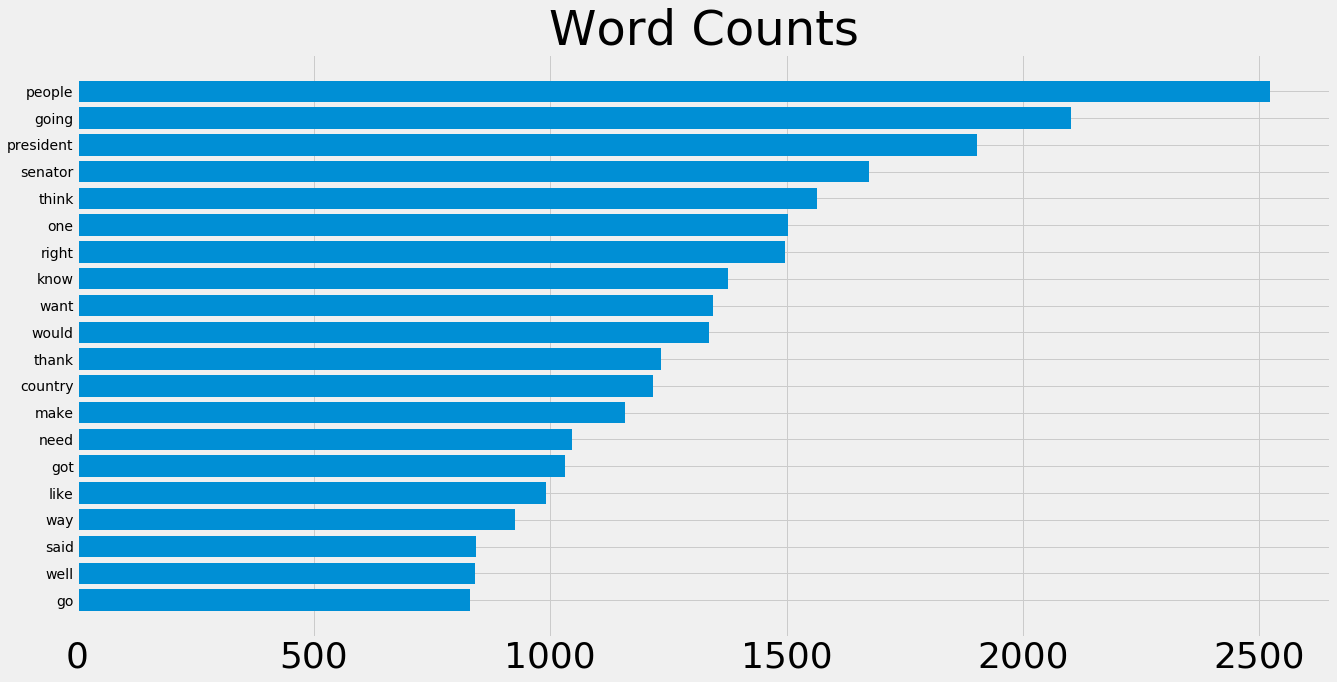

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(word_counts.index[:20], word_counts[:20])
plt.title('Word Counts', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

In [23]:
biden_words = all_transcripts[all_transcripts['Speaker'] == 'biden'].Line.str.split(expand=True).stack().value_counts()
warren_words = all_transcripts[all_transcripts['Speaker'] == 'warren'].Line.str.split(expand=True).stack().value_counts()
sanders_words = all_transcripts[all_transcripts['Speaker'] == 'sanders'].Line.str.split(expand=True).stack().value_counts()
pete_words = all_transcripts[all_transcripts['Speaker'] == 'buttigieg'].Line.str.split(expand=True).stack().value_counts()

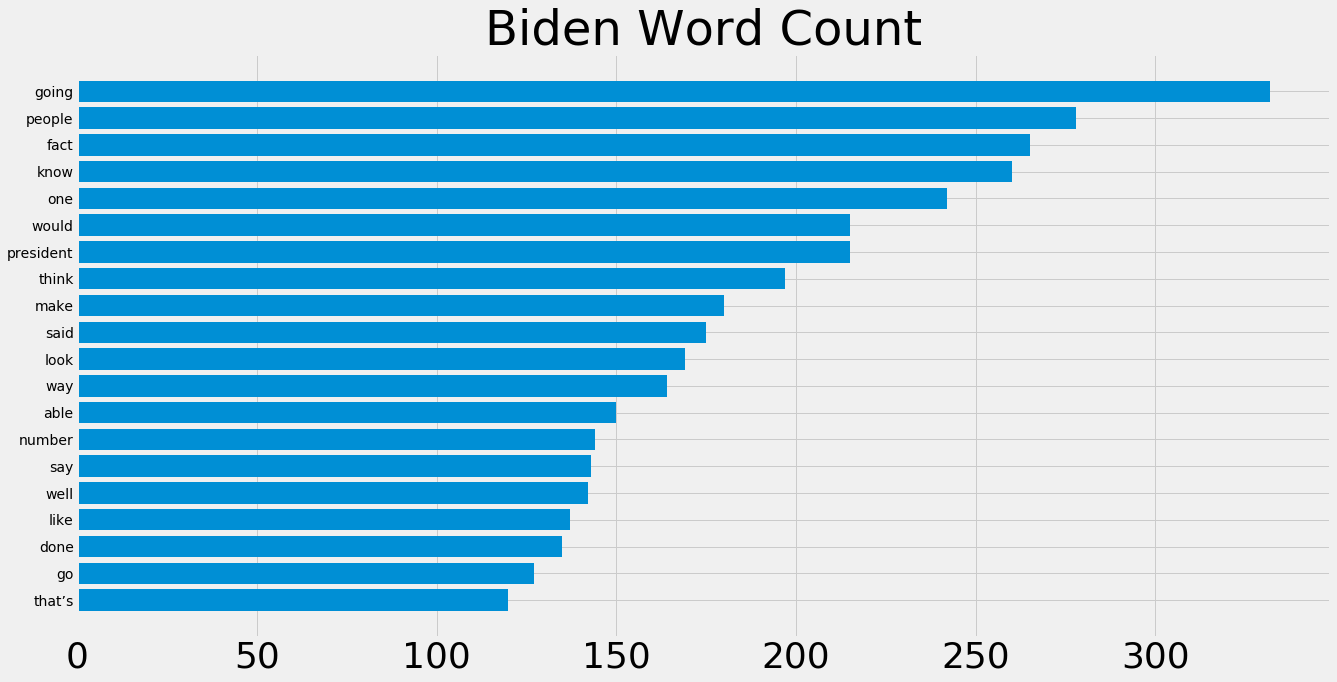

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(biden_words.index[:20], biden_words[:20])
plt.title('Biden Word Count', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

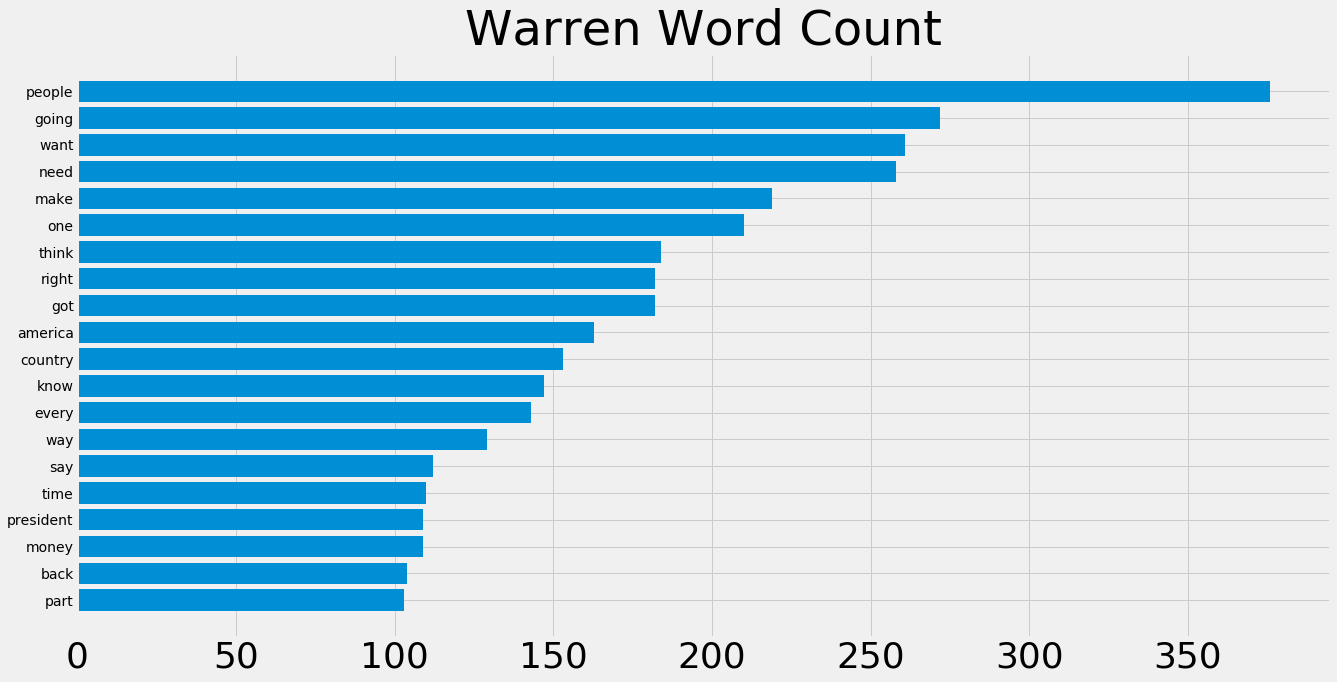

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(warren_words.index[:20], warren_words[:20])
plt.title('Warren Word Count', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

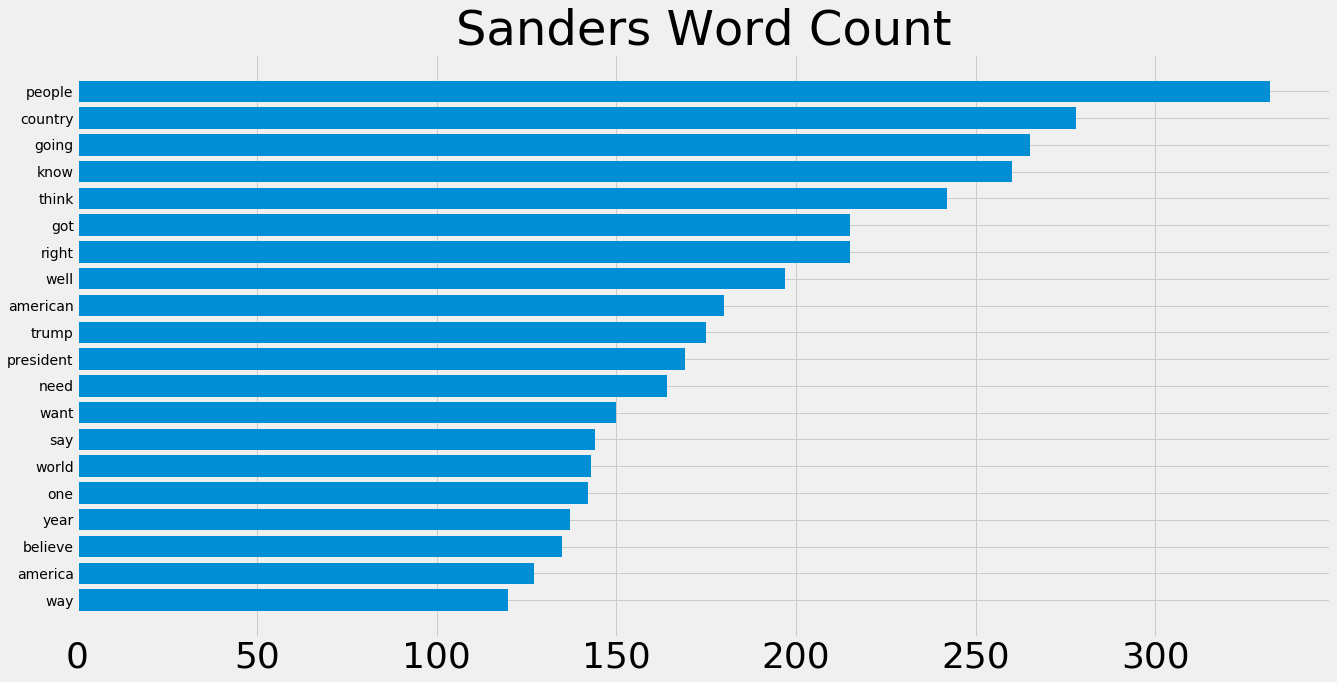

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(sanders_words.index[:20], biden_words[:20])
plt.title('Sanders Word Count', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

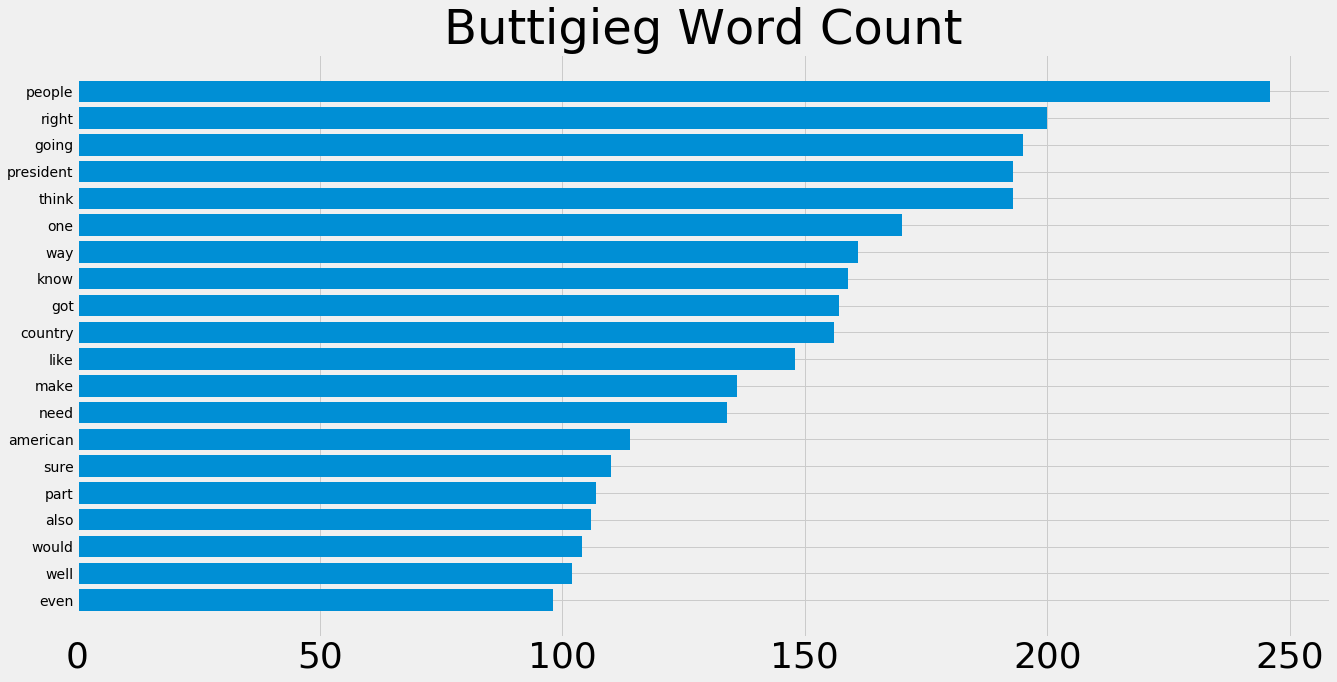

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(pete_words.index[:20], pete_words[:20])
plt.title('Buttigieg Word Count', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

In [28]:
all_transcripts[all_transcripts['Speaker'] == 'sanders']

,Line,Speaker,State
493,okay well you’re quite right new vision americ...,sanders,florida
494,system way vast majority people country paying...,sanders,florida
495,believe education future country believe must ...,sanders,florida
496,every proposal brought forth fully paid,sanders,florida
498,people healthcare medicare premiums deductible...,sanders,florida
...,...,...,...
9063,issue need talk need work climate change moral...,sanders,nevada
9064,increasingly unhealthy uninhabitable,sanders,nevada
9068,mean know,sanders,nevada
9070,good know take votes granted hardworking campa...,sanders,nevada
